In [42]:
import practicalSPARQL
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [43]:
root_q = 'queries'
root_d = 'results'

# read login data
login = pd.read_json('config_sparql.json')
ENDPOINT = login['endpoint'][0]
USERNAME = login['username'][0]
PASSWORD = login['password'][0]

# create sparql object
sparql = practicalSPARQL.practicalWrapper(ENDPOINT)
sparql.setCredentials(USERNAME, PASSWORD)

print("--- Querying ENDPOINT: {} ---".format(ENDPOINT))

--- Querying ENDPOINT: http://devmeta.sphaera.mpiwg-berlin.mpg.de/sparql ---


In [44]:
q = practicalSPARQL.stringify_SPARQL('elements_query_050824.sparql')    # select data from the ttl file as a dataframe
df = sparql.select_as_dataframe(q)

In [45]:
q = practicalSPARQL.stringify_SPARQL('books_query.sparql')    # select data from the ttl file as a dataframe
books = sparql.select_as_dataframe(q)

C:\Users\nogas\AppData\Local\Temp\ipykernel_20460\1511858971.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_20460\1511858971.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_books_per_interval = books.groupby('interval')['book'].nunique().reset_index()


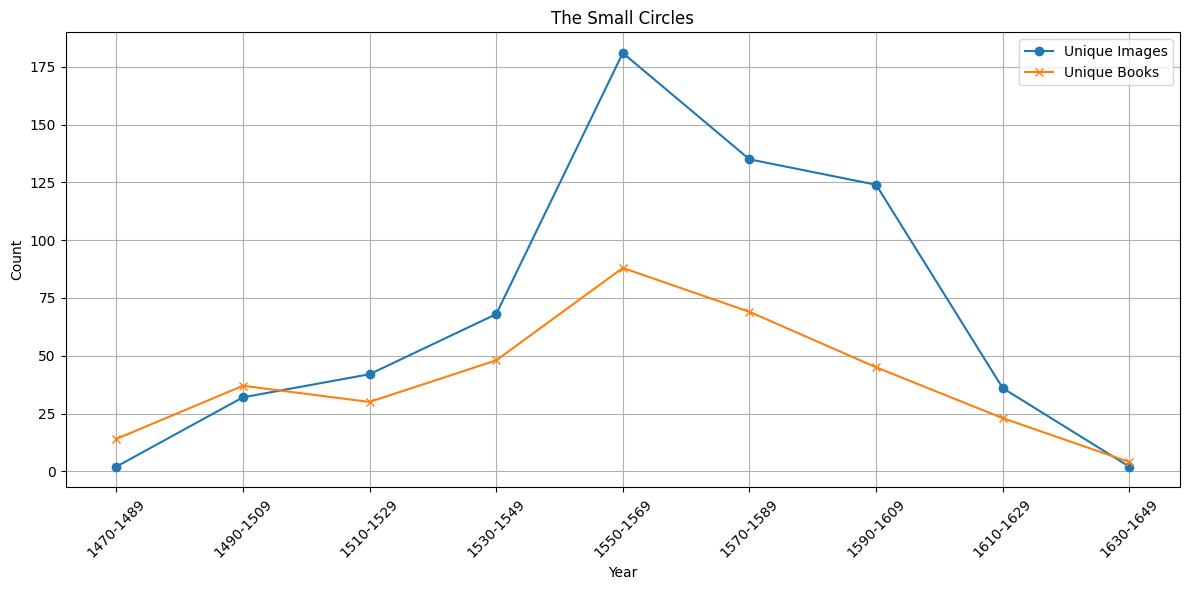

In [46]:
# Ensure the year column is of integer type
df['year'] = df['year'].astype(int)
books['year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Add interval column to the images DataFrame
df['interval'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

# Add interval column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Define keywords
keywords = [
'CK_Tropics', 'CK_Polar Circles', 'CK_Distances between Small Circles', 'CK_Parallels'

]

# Create a boolean mask for the keywords
mask = df['cks'].apply(lambda x: any(keyword in x for keyword in keywords))

# Filter the DataFrame based on the mask
filtered_df = df[mask]

# Count unique images per interval
unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
unique_images_per_interval.columns = ['interval', 'unique_images']

# Count unique books per interval
unique_books_per_interval = books.groupby('interval')['book'].nunique().reset_index()
unique_books_per_interval.columns = ['interval', 'unique_books']

# Merge the two DataFrames on 'interval'
merged_df = pd.merge(unique_images_per_interval, unique_books_per_interval, on='interval', how='outer')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(merged_df['interval'], merged_df['unique_images'], label='Unique Images', marker='o')
plt.plot(merged_df['interval'], merged_df['unique_books'], label='Unique Books', marker='x')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('The Small Circles')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_20460\2111424761.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_20460\2111424761.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_20460\2111424761.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observe

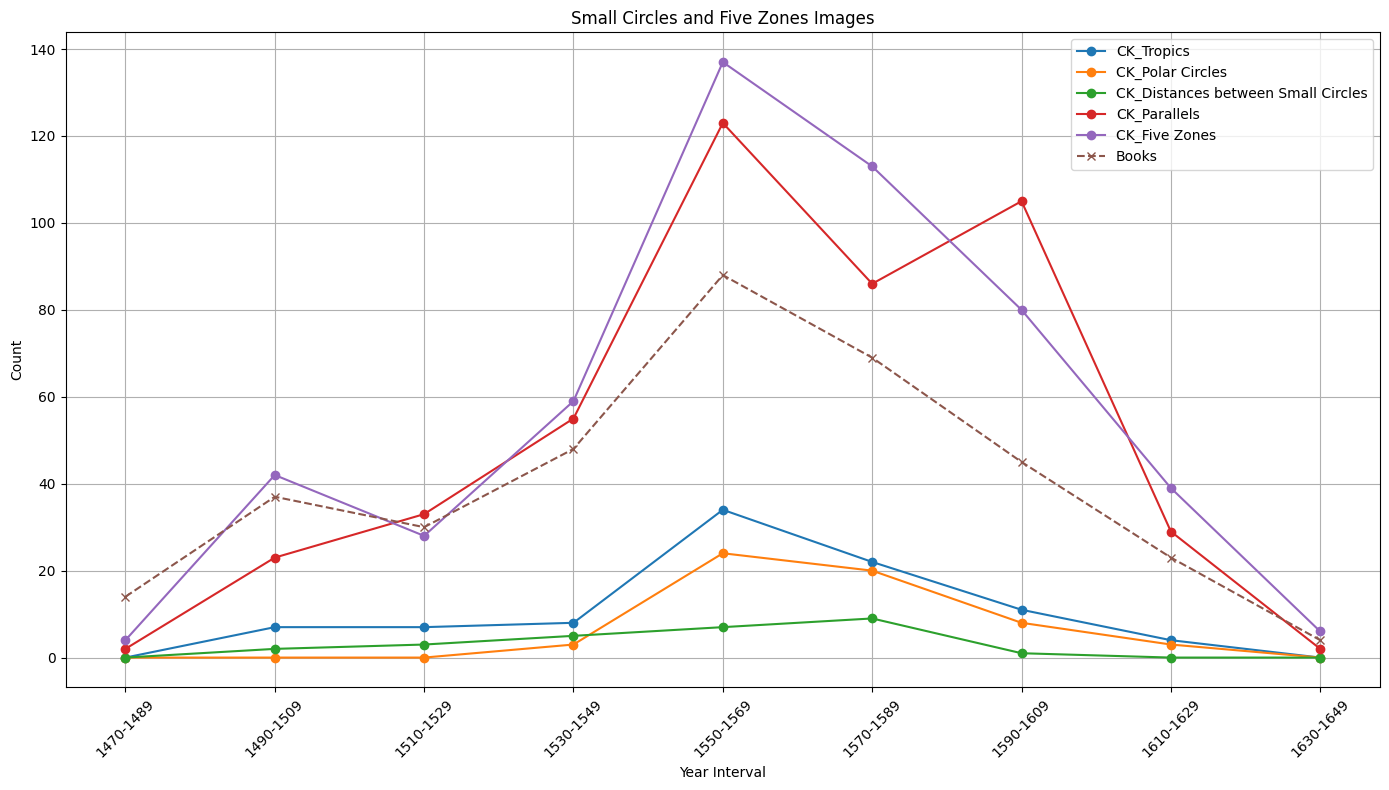

In [47]:
# Ensure the year column is of integer type
df['year'] = df['year'].astype(int)
books['year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Add interval column to the images DataFrame
df['interval'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

# Add interval column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Define keywords
keywords = [
'CK_Tropics', 'CK_Polar Circles', 'CK_Distances between Small Circles', 'CK_Parallels', 'CK_Five Zones'
]

# Prepare a DataFrame for each keyword
keyword_dfs = {}
for keyword in keywords:
    # Create a boolean mask for the keyword
    mask = df['cks'].apply(lambda x: keyword in x)
    
    # Filter the DataFrame based on the mask
    filtered_df = df[mask]
    
    # Count unique images per interval for this keyword
    unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
    unique_images_per_interval.columns = ['interval', f'unique_images_{keyword}']
    
    keyword_dfs[keyword] = unique_images_per_interval

# Merge all keyword DataFrames on 'interval'
merged_keyword_df = pd.merge(keyword_dfs[keywords[0]], keyword_dfs[keywords[1]], on='interval', how='outer')
for keyword in keywords[2:]:
    merged_keyword_df = pd.merge(merged_keyword_df, keyword_dfs[keyword], on='interval', how='outer')

# Count unique books per interval
unique_books_per_interval = books.groupby('interval')['book'].nunique().reset_index()
unique_books_per_interval.columns = ['interval', 'unique_books']

# Merge the keyword DataFrame with the books DataFrame
final_df = pd.merge(merged_keyword_df, unique_books_per_interval, on='interval', how='outer')

# Plot the results
plt.figure(figsize=(14, 8))

# Plot each keyword
for keyword in keywords:
    plt.plot(final_df['interval'], final_df[f'unique_images_{keyword}'], label=f'{keyword}', marker='o')

# Plot unique books
plt.plot(final_df['interval'], final_df['unique_books'], label='Books', marker='x', linestyle='--')

plt.xlabel('Year Interval')
plt.ylabel('Count')
plt.title('Small Circles and Five Zones Images')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
# Define the values to filter by
keywords = ['CK_Tropics', 'CK_Polar Circles', 'CK_Distances between Small Circles']

# Create a boolean mask for filtering
mask = df['cks'].apply(lambda x: any(keyword in x for keyword in keywords))

# Filter the DataFrame
filtered_df = df[mask]

# Path to the Excel file
excel_file_path = 'C:\\Users\\nogas\\Image_data\\celestial_circles.xlsx'

# Load the Excel file into a DataFrame
excel_data = pd.read_excel(excel_file_path)

small_circles_visual = pd.merge(filtered_df, excel_data, on='cluster_name', how='left')

In [49]:
small_circles_visual

,images,cluster_name,cks,book,bid,part_or_adaption,part_or_adaption_label,type_label,custom_identifier,place,...,multiple moments,multiple perspectives,color,multiple circles,"decorated or stars, tail, scales",picture,terraqueous globe,diagram,small circles representing mutual three dimensional motion,symbol
0,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00231,CK_Tropics,http://sphaera.mpiwg-berlin.mpg.de/id/item/0a7...,1624,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,"Content, Annotated",231,Paris,...,no,no,no,no,no,no,no,no,no,no
1,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00231,CK_Tropics,http://sphaera.mpiwg-berlin.mpg.de/id/item/0a7...,1624,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,"Content, Annotated",231,Paris,...,no,no,no,no,no,no,no,no,no,no
2,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00924,CK_Distances between Small Circles,http://sphaera.mpiwg-berlin.mpg.de/id/item/13e...,1929,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Francesco Capuano's second commentary on the T...,"Annotated, Content",951,Venice,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00207,"CK_Tropics, CK_Geometry for Geometry",http://sphaera.mpiwg-berlin.mpg.de/id/item/13e...,1929,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,"Annotated, Content",231,Venice,...,no,no,no,no,no,no,no,no,no,no
4,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00207,"CK_Tropics, CK_Geometry for Geometry",http://sphaera.mpiwg-berlin.mpg.de/id/item/13e...,1929,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,"Annotated, Content",231,Venice,...,no,no,no,no,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01261,"CK_Parallels, CK_Distances between Small Circles",http://sphaera.mpiwg-berlin.mpg.de/id/item/3dc...,2253,http://sphaera.mpiwg-berlin.mpg.de/id/part/5ff...,Treatise on Cosmography (Sphaera),"Original Part, Content",688,Paris,...,no,no,no,yes,no,no,no,no,no,no
174,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01261,"CK_Parallels, CK_Distances between Small Circles",http://sphaera.mpiwg-berlin.mpg.de/id/item/3a3...,2257,http://sphaera.mpiwg-berlin.mpg.de/id/part/5ff...,Treatise on Cosmography (Sphaera),"Original Part, Content",688,Paris,...,no,no,no,yes,no,no,no,no,no,no
175,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_02371,CK_Tropics,http://sphaera.mpiwg-berlin.mpg.de/id/item/4bf...,2240,http://sphaera.mpiwg-berlin.mpg.de/id/part/c54...,Dodoen's Isagoge,"Original Part, Content",654,Antwerp,...,no,no,no,no,no,no,no,no,no,no
176,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01398,"CK_Tropics, CK_Zodiac",http://sphaera.mpiwg-berlin.mpg.de/id/item/cc6...,1962,http://sphaera.mpiwg-berlin.mpg.de/id/part/47c...,Compendium by P. Valeriano,"Content, Original Part",251,Paris,...,no,no,no,no,no,no,no,no,no,no


C:\Users\nogas\AppData\Local\Temp\ipykernel_20460\1235682919.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_20460\1235682919.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_20460\1235682919.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to r

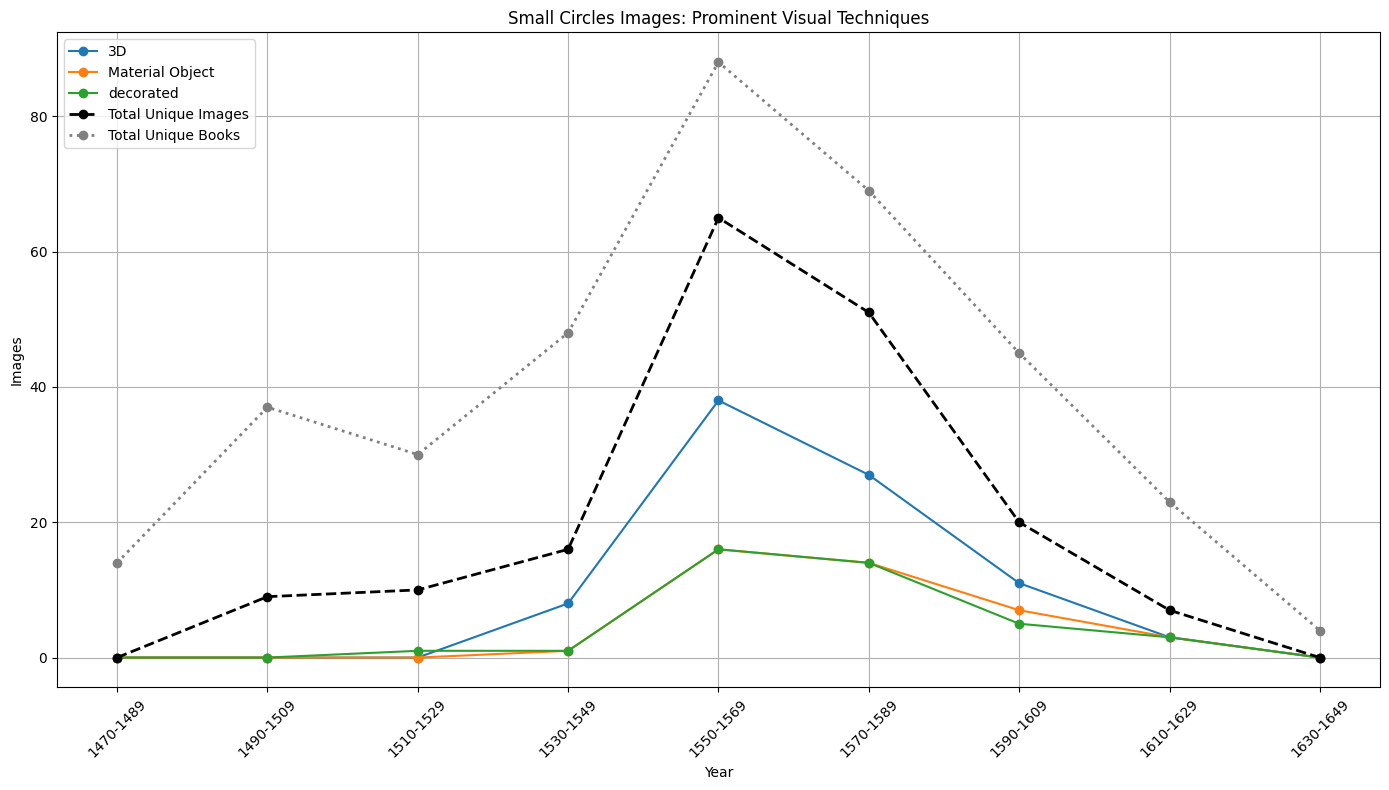

In [51]:
# Convert 'year' to int
small_circles_visual['year'] = small_circles_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
small_circles_visual['interval'] = pd.cut(small_circles_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = small_circles_visual[small_circles_visual[column_name] == value]
    return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
three_dimensions_effect = count_unique_images_by_column('3D', 'yes')
human_figures = count_unique_images_by_column('human figures', 'yes')
material_object = count_unique_images_by_column('material object (double lines)', 'yes')
multiple_moments = count_unique_images_by_column('multiple moments', 'yes')
multiple_perspectives = count_unique_images_by_column('multiple perspectives', 'yes')
color = count_unique_images_by_column('color', 'yes')
multiple_circles = count_unique_images_by_column('multiple circles', 'yes')
decorated_or_stars = count_unique_images_by_column('decorated or stars, tail, scales', 'yes')
picture = count_unique_images_by_column('picture', 'yes')
terraqueous_globe = count_unique_images_by_column('terraqueous globe', 'yes')
diagram = count_unique_images_by_column('diagram', 'yes')
small_circles = count_unique_images_by_column('small circles representing mutual three dimensional motion', 'yes')
symbol = count_unique_images_by_column('symbol', 'yes')

# Combine the data for lines
side_by_side_data = pd.DataFrame({
    '3D': three_dimensions_effect,
    'Material Object': material_object,
    'decorated': decorated_or_stars,
    
})

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)
total_unique_images = filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Plot lines with single y-axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique images and total unique books
ax.plot(labels, total_unique_images, marker='o', linestyle='--', color='black', label='Total Unique Images', linewidth=2)
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Images')
ax.set_title('Small Circles Images: Prominent Visual Techniques')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()